### 6.3 그리드서치에 파이프라인 적용하기

- 그리드 서치를 위한 후보 파라미터 설정시에 각 파라미터 이름 설정
  - '단계의 이름' + '__' + '파라미터 이름'

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [2]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


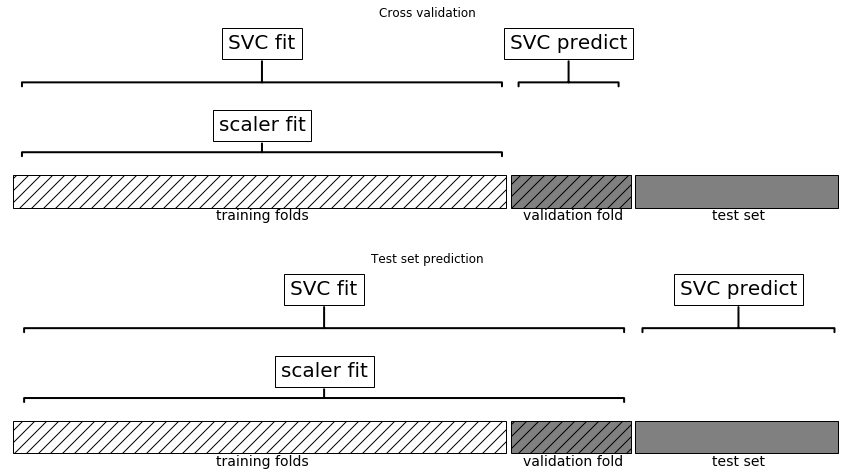

In [4]:
mglearn.plots.plot_proper_processing()

#### [데이터 전처리 과정에 검증데이터 정보 누설에 따른 문제를 보여주는 예시]

- 아래에 임의로 생성한 데이터 X와 y는 전혀 연관관계가 없으므로 회귀 문제로 값을 예측하면 예측이 잘 안되는 것이 올바름

In [5]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

- Pipeline 사용없이 전체 데이터를 미리 전처리(변환)한 이후 그러한 데이터로 교차 검증을 하는 경우 예제 (잘못된 예제)

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)

X_selected = select.transform(X)

print("X_selected.shape: {}".format(X_selected.shape))

print("Cross-validation accuracy (cv only on ridge): {:.2f}".format(
        np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))
    )
)

X_selected.shape: (100, 500)
Cross-validation accuracy (cv only on ridge): 0.91


- Pipeline을 사용하여 전체 데이터의 전처리를 데이터 교차 검증과 내에서 수행하도록 하는 경우 예제 (올바른 예제)

In [7]:
select = SelectPercentile(score_func=f_regression, percentile=5)
model = Ridge()

pipe = Pipeline([("select", select), ("ridge", model)])
print("Cross-validation accuracy (pipeline): {:.2f}".format(
        np.mean(cross_val_score(pipe, X, y, cv=5))
    )
)

Cross-validation accuracy (pipeline): -0.25
